In [1]:
import numpy as np
from ehssim import Hypergraph

In [2]:
zero_ket = np.array([1, 0], dtype=np.complex_)
one_ket = np.array([0, 1], dtype=np.complex_)
plus_ket = np.array([1 / np.sqrt(2), 1 / np.sqrt(2)], dtype=np.complex_)
minus_ket = np.array([1 / np.sqrt(2), -1 / np.sqrt(2)], dtype=np.complex_)

X_rule = [{
    'match':[zero_ket],
    'replace':[one_ket]
},
{
    'match':[one_ket],
    'replace':[zero_ket]
}]

H_rule = [{
    'match':[zero_ket],
    'replace':[plus_ket]
},
{
    'match':[one_ket],
    'replace':[minus_ket]
}]

SWAP_rule = [{
    'match':[zero_ket, one_ket],
    'replace':[one_ket, zero_ket]
},
{
    'match':[one_ket, zero_ket],
    'replace':[zero_ket, one_ket]
}]

CX_rule = [{
    'match':[one_ket, one_ket],
    'replace':[one_ket, zero_ket]
},
{
    'match':[one_ket, zero_ket],
    'replace':[one_ket, one_ket]
}]

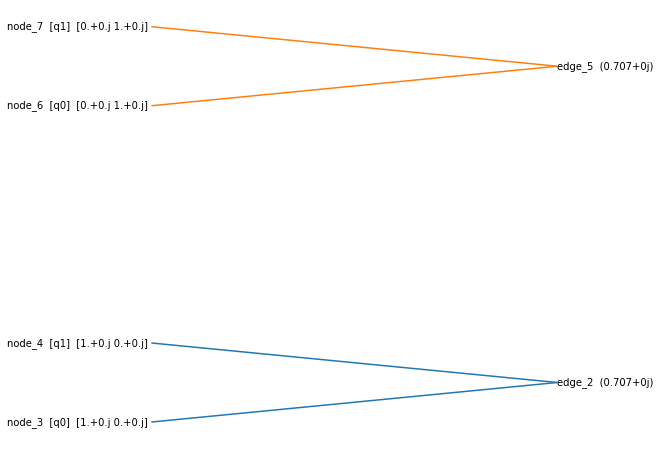

In [3]:
# start with 2 qubits:
system = Hypergraph(2)
system.rewrite(H_rule,["q0"])
system.rewrite(CX_rule,["q0","q1"])

system.draw()